<h1>Preparing Data</h1>

In [3]:
import pandas as pd

In [4]:
dataset = pd.read_excel('/content/4A_TB_cleaned.xlsx')

In [5]:
dataset.head()

,UNIT,IP NUMBER,SEX,AGE,RELIGION,DISTRICT OF RESIDENCE,WORKING DIAGNOSIS,OUT COME,NUMBER OF PREVIOUS ADMISSIONS,TB_type,MARITAL STATUS,MONTH OF ADMISSION,DAY OF ADMISSION,YEAR OF ADMISSION,DURATION,REGION,ADDITIONAL WORKING DIAGNOSIS,NUMBER OF ADDITIONAL WORKING DIAGNOSIS
0,GI,1861416,M,30,COU,Nakasongola,"ISS,Abdominal TB,,",IMPROVED,5,Abdominal_TB,2,November,Tuesday,2010,6,CENTRAL,"ISS,,",1
1,GI,1861416,M,30,COU,Nakasongola,"ISS,Abdominal TB,,",IMPROVED,5,Abdominal_TB,2,November,Tuesday,2010,6,CENTRAL,"ISS,,",1
2,GI,1861416,M,30,COU,Nakasongola,"ISS,Abdominal TB,,",IMPROVED,5,Abdominal_TB,2,November,Tuesday,2010,6,CENTRAL,"ISS,,",1
3,GI,1861416,M,30,COU,Nakasongola,"ISS,Abdominal TB,,",IMPROVED,5,Abdominal_TB,2,November,Tuesday,2010,6,CENTRAL,"ISS,,",1
4,GI,1868011,F,46,COU,Kampala,"ISS Stage I&II,Disseminated TB,,",IMPROVED,3,Disseminated TB,2,December,Monday,2010,4,CENTRAL,"ISS Stage I&II,,",1


In [ ]:
# dataset = pd.concat([dataset] * 4, ignore_index=True)

In [6]:
dataset.shape

(16368, 18)

In [7]:
num_weeks = 4

# Converting duration to whole weeks (assuming 7 days per week)
dataset['Duration (weeks)'] = dataset['DURATION'].apply(lambda x: int(x // 7 + (x % 7 > 0)))

# function to identify the last week of appearance
def get_last_week(row):
  if row['OUT COME'] != 'DIED':
    return min(row['Duration (weeks)'], num_weeks)
  else:
    return 0

dataset['Last Week'] = dataset.apply(get_last_week, axis=1)

In [8]:
for week in range(1, num_weeks + 1):
  # Checking for non-deaths and appearance within the week
  mask = (dataset['OUT COME'] != 'DIED') & (dataset['Last Week'] >= week)
  dataset.loc[mask, f'Week_{week}'] = 0


  #Checking for deaths within the week and below
  dead_mask = (dataset['OUT COME'] == 'DIED') & ((dataset['DURATION'] / 7) <= week)
  dataset.loc[dead_mask, f'Week_{week}'] = 1

  dead_later_mask = (dataset['OUT COME'] == 'DIED') & ((dataset['DURATION'] / 7) > week)
  dataset.loc[dead_later_mask, f'Week_{week}'] = 0

dataset.drop('Last Week', axis=1, inplace=True)

In [9]:
dataset.sample(10)

,UNIT,IP NUMBER,SEX,AGE,RELIGION,DISTRICT OF RESIDENCE,WORKING DIAGNOSIS,OUT COME,NUMBER OF PREVIOUS ADMISSIONS,TB_type,...,YEAR OF ADMISSION,DURATION,REGION,ADDITIONAL WORKING DIAGNOSIS,NUMBER OF ADDITIONAL WORKING DIAGNOSIS,Duration (weeks),Week_1,Week_2,Week_3,Week_4
10885,IDM,232590,M,28,CATHOLIC,KAMPALA,"HIV,PTB,ORAL CANDIDIASIS",IMPROVED,0,PTB,...,2016,6,CENTRAL,"HIV,ORAL CANDIDIASIS",2,1,0.0,NaN,NaN,NaN
7509,IDM,30140,M,35,CATHOLIC,WAKISO,"PTB,CCM,HIV",DIED,0,PTB,...,2014,14,CENTRAL,"CCM,HIV",2,2,0.0,1.0,1.0,1.0
12766,IDM,340174,M,35,ISLAM,KAMPALA,"HIV,B/PNEUMONIA,TB IRIS",DIED,0,TB iris,...,2017,4,CENTRAL,"HIV,B/PNEUMONIA",2,1,1.0,1.0,1.0,1.0
13742,IDM,381198,M,57,ISLAM,WAKISO,"HIV,TBM",IMPROVED,0,CNS_TB,...,2018,3,CENTRAL,HIV,1,1,0.0,NaN,NaN,NaN
10736,IDM,231347,M,21,CATHOLIC,KAMPALA,"HIV,DTB",DIED,0,Disseminated TB,...,2016,4,CENTRAL,HIV,1,1,1.0,1.0,1.0,1.0
14859,IDF,409880,F,34,PENTECOSTAL,WAKISO,"PUERPERAL PSYCHOSIS,TBM,HIV",IMPROVED,0,CNS_TB,...,2018,24,CENTRAL,"PUERPERAL PSYCHOSIS,HIV",2,4,0.0,0.0,0.0,0.0
2241,IDM,2061405,M,30,OTHERS,LUWERO,"ABDOMINAL TB,ISS",IMPROVED,10,Abdominal_TB,...,2012,11,CENTRAL,ISS,1,2,0.0,0.0,NaN,NaN
12539,IDM,308649,M,40,CATHOLIC,KAMPALA,"HIV,TB,CCM",DIED,0,Other TBs,...,2017,13,CENTRAL,"HIV,CCM",2,2,0.0,1.0,1.0,1.0
6760,IDM,2265942,M,34,CATHOLIC,KAMPALA,"PTB,HIV",IMPROVED,0,PTB,...,2014,14,CENTRAL,HIV,1,2,0.0,0.0,NaN,NaN
4340,IDM,2153054,M,32,COU,KAMPALA,"DISSEMINATED TB,HIV",DIED,0,Disseminated TB,...,2013,7,CENTRAL,HIV,1,1,1.0,1.0,1.0,1.0


In [10]:
#Deleting features which are not going to be used
features_to_remove = ['UNIT','DISTRICT OF RESIDENCE','WORKING DIAGNOSIS',
                      'ADDITIONAL WORKING DIAGNOSIS', 'MARITAL STATUS', 'IP NUMBER', 'Duration (weeks)']
dataset.drop(features_to_remove, axis = 1, inplace=True)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16368 entries, 0 to 16367
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   SEX                                     16368 non-null  object 
 1   AGE                                     16368 non-null  int64  
 2   RELIGION                                16368 non-null  object 
 3   OUT COME                                16368 non-null  object 
 4   NUMBER OF PREVIOUS ADMISSIONS           16368 non-null  int64  
 5   TB_type                                 16368 non-null  object 
 6   MONTH OF ADMISSION                      16368 non-null  object 
 7   DAY OF ADMISSION                        16368 non-null  object 
 8   YEAR OF ADMISSION                       16368 non-null  int64  
 9   DURATION                                16368 non-null  int64  
 10  REGION                                  16368 non-null  ob

In [12]:
dataset.head()

,SEX,AGE,RELIGION,OUT COME,NUMBER OF PREVIOUS ADMISSIONS,TB_type,MONTH OF ADMISSION,DAY OF ADMISSION,YEAR OF ADMISSION,DURATION,REGION,NUMBER OF ADDITIONAL WORKING DIAGNOSIS,Week_1,Week_2,Week_3,Week_4
0,M,30,COU,IMPROVED,5,Abdominal_TB,November,Tuesday,2010,6,CENTRAL,1,0.0,NaN,NaN,NaN
1,M,30,COU,IMPROVED,5,Abdominal_TB,November,Tuesday,2010,6,CENTRAL,1,0.0,NaN,NaN,NaN
2,M,30,COU,IMPROVED,5,Abdominal_TB,November,Tuesday,2010,6,CENTRAL,1,0.0,NaN,NaN,NaN
3,M,30,COU,IMPROVED,5,Abdominal_TB,November,Tuesday,2010,6,CENTRAL,1,0.0,NaN,NaN,NaN
4,F,46,COU,IMPROVED,3,Disseminated TB,December,Monday,2010,4,CENTRAL,1,0.0,NaN,NaN,NaN


In [ ]:
#dataset.to_excel('4A_TB_Prepared1.xlsx', index=False)

<h1>Data Preprocessing</h1>

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
dataset['MONTH OF ADMISSION'].unique()

array(['November', 'December', 'January', 'February', 'March', 'April',
       'May', 'June', 'July', 'August', 'September', 'October'],
      dtype=object)

In [ ]:
dataset['DAY OF ADMISSION'].unique()

array(['Tuesday', 'Monday', 'Wednesday', 'Thursday', 'Sunday', 'Friday',
       'Saturday'], dtype=object)

In [ ]:
# dictionary for month encoding
month_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
                 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

# dictionary for day of week encoding
day_mapping = {'Sunday': 1, 'Monday': 2, 'Tuesday': 3, 'Wednesday': 4, 'Thursday': 5, 'Friday': 6, 'Saturday':76 }

dataset['Month of Admission'] = dataset['MONTH OF ADMISSION'].map(month_mapping)
dataset['Day of Admission'] = dataset['DAY OF ADMISSION'].map(day_mapping)

dataset.drop(columns=['MONTH OF ADMISSION', 'DAY OF ADMISSION'], inplace=True)


In [ ]:
textual_columns = ['SEX', 'RELIGION', 'TB_type', 'REGION']

# Encoding textual data
encoder = LabelEncoder()
for col in textual_columns:
  dataset[col] = encoder.fit_transform(dataset[col])

In [ ]:
dataset.head(20)

,SEX,AGE,RELIGION,OUT COME,NUMBER OF PREVIOUS ADMISSIONS,TB_type,YEAR OF ADMISSION,DURATION,REGION,NUMBER OF ADDITIONAL WORKING DIAGNOSIS,Week_1,Week_2,Week_3,Week_4,Month of Admission,Day of Admission
0,1,30,1,IMPROVED,5,0,2010,6,0,1,0.0,NaN,NaN,NaN,11,3
1,1,30,1,IMPROVED,5,0,2010,6,0,1,0.0,NaN,NaN,NaN,11,3
2,1,30,1,IMPROVED,5,0,2010,6,0,1,0.0,NaN,NaN,NaN,11,3
3,1,30,1,IMPROVED,5,0,2010,6,0,1,0.0,NaN,NaN,NaN,11,3
4,0,46,1,IMPROVED,3,2,2010,4,0,1,0.0,NaN,NaN,NaN,12,2
5,0,46,1,IMPROVED,3,2,2010,4,0,1,0.0,NaN,NaN,NaN,12,2
6,0,46,1,IMPROVED,3,2,2010,4,0,1,0.0,NaN,NaN,NaN,12,2
7,0,46,1,IMPROVED,3,2,2010,4,0,1,0.0,NaN,NaN,NaN,12,2
8,1,80,2,IMPROVED,7,0,2010,8,0,2,0.0,0.0,NaN,NaN,12,4
9,1,80,2,IMPROVED,7,0,2010,8,0,2,0.0,0.0,NaN,NaN,12,4


In [ ]:
dataset.shape

(65472, 16)

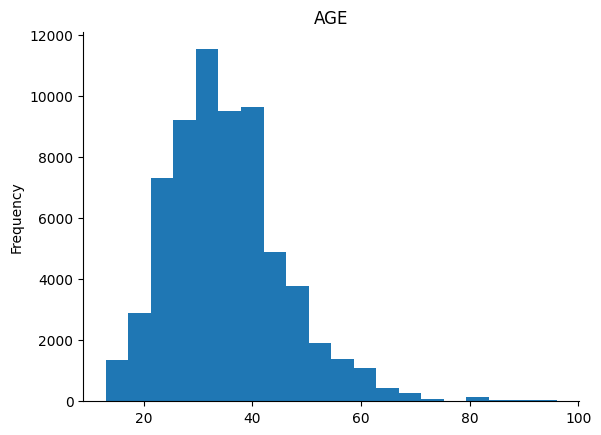

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

dataset['AGE'].plot(kind='hist', bins=20, title='AGE')
plt.gca().spines[['top', 'right',]].set_visible(False)

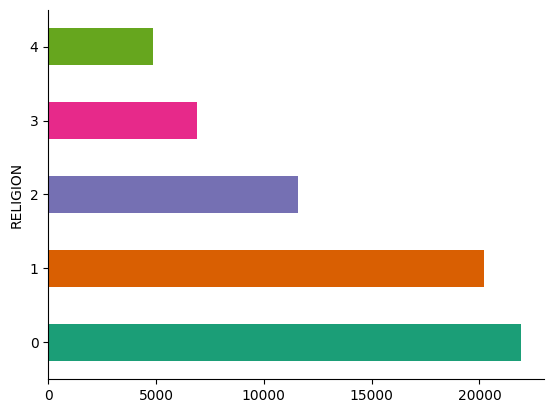

In [ ]:
dataset.groupby('RELIGION').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

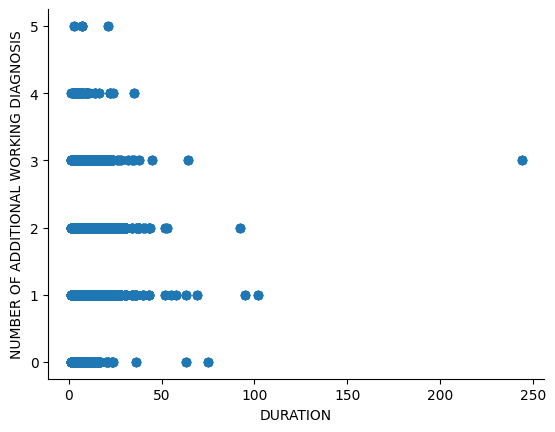

In [ ]:
dataset.plot(kind='scatter', x='DURATION', y='NUMBER OF ADDITIONAL WORKING DIAGNOSIS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

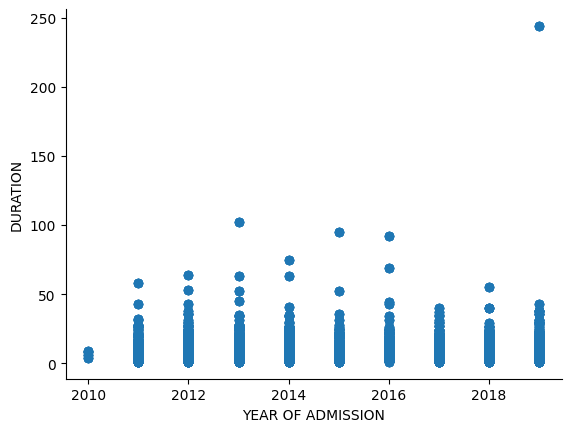

In [ ]:
dataset.plot(kind='scatter', x='YEAR OF ADMISSION', y='DURATION', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

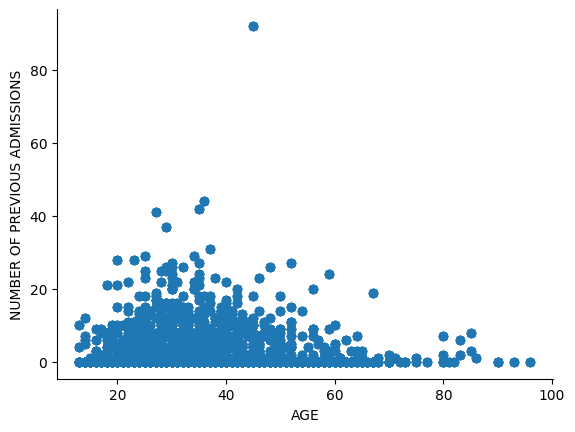

In [ ]:
dataset.plot(kind='scatter', x='AGE', y='NUMBER OF PREVIOUS ADMISSIONS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

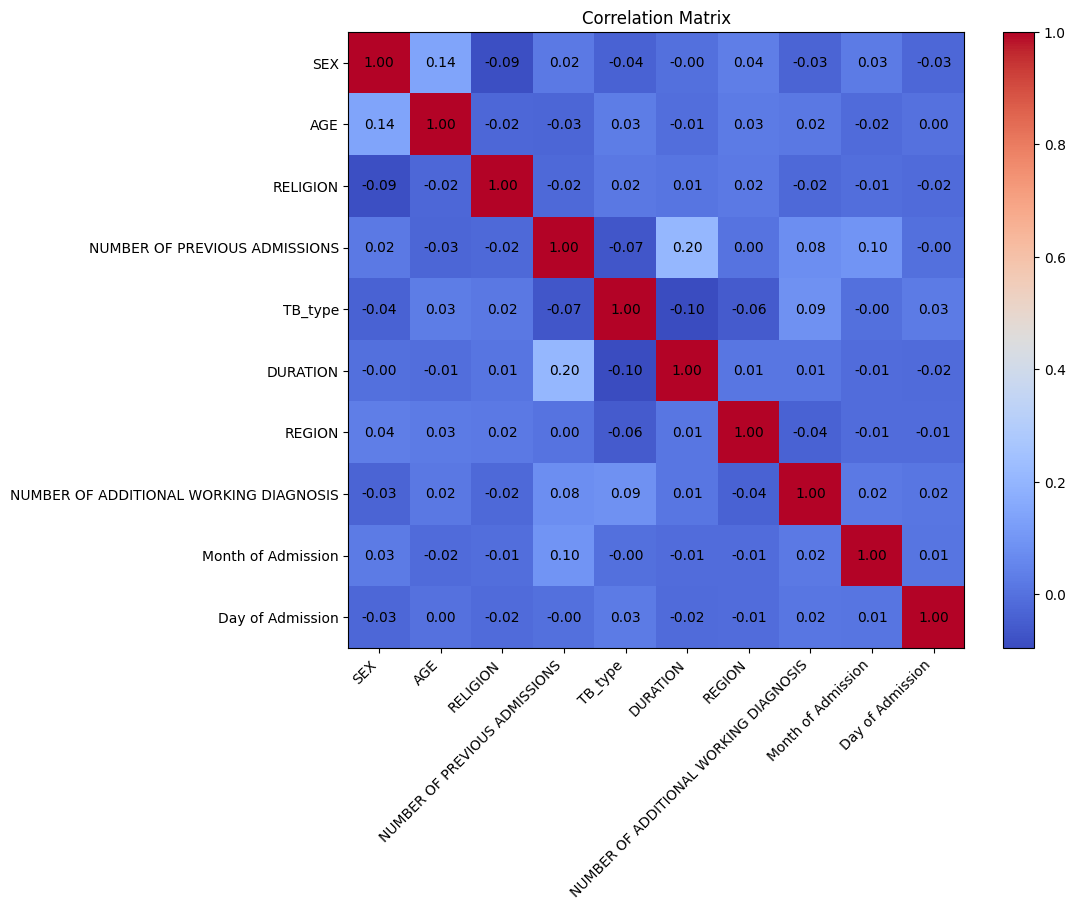

In [ ]:
columns = ['SEX', 'AGE', 'RELIGION', 'NUMBER OF PREVIOUS ADMISSIONS', 'TB_type', 'DURATION',
           'REGION', 'NUMBER OF ADDITIONAL WORKING DIAGNOSIS', 'Month of Admission', 'Day of Admission']
correlation_matrix = dataset[columns].corr()

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm')
plt.colorbar()

for i in range(len(columns)):
  for j in range(len(columns)):
    plt.text(i, j, "{:.2f}".format(correlation_matrix.iloc[i, j]), ha='center', va='center')

plt.xticks(range(len(columns)), columns, rotation=45, ha='right')
plt.yticks(range(len(columns)), columns)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
dataset.head()

,SEX,AGE,RELIGION,OUT COME,NUMBER OF PREVIOUS ADMISSIONS,TB_type,YEAR OF ADMISSION,DURATION,REGION,NUMBER OF ADDITIONAL WORKING DIAGNOSIS,Week_1,Week_2,Week_3,Week_4,Month of Admission,Day of Admission
0,1,30,1,IMPROVED,5,0,2010,6,0,1,0.0,NaN,NaN,NaN,11,3
1,1,30,1,IMPROVED,5,0,2010,6,0,1,0.0,NaN,NaN,NaN,11,3
2,1,30,1,IMPROVED,5,0,2010,6,0,1,0.0,NaN,NaN,NaN,11,3
3,1,30,1,IMPROVED,5,0,2010,6,0,1,0.0,NaN,NaN,NaN,11,3
4,0,46,1,IMPROVED,3,2,2010,4,0,1,0.0,NaN,NaN,NaN,12,2


In [ ]:
dataset['SEX'].unique()

array([1, 0])

In [ ]:
dataset['AGE'].unique()

array([30, 46, 80, 22, 18, 24, 57, 37, 29, 25, 33, 32, 50, 36, 19, 43, 34,
       16, 31, 40, 39, 28, 47, 35, 56, 48, 23, 59, 17, 38, 45, 52, 13, 42,
       41, 49, 67, 27, 21, 14, 44, 63, 26, 65, 20, 61, 83, 70, 60, 64, 55,
       62, 54, 58, 85, 53, 15, 86, 51, 75, 73, 72, 68, 77, 93, 82, 66, 81,
       96, 90, 71])

In [ ]:
dataset['RELIGION'].unique()

array([1, 2, 0, 4, 3])

In [ ]:
dataset['NUMBER OF PREVIOUS ADMISSIONS'].unique()

array([ 5,  3,  7,  8,  4,  2,  6,  1, 10,  9, 13, 14, 11, 20, 27, 17, 12,
       19, 22, 18, 23, 15, 31, 25, 42, 44, 29, 26, 16, 41, 28, 21, 37, 24,
       92,  0])

In [ ]:
dataset['TB_type'].unique()

array([0, 2, 4, 3, 1, 5])

In [ ]:
dataset['YEAR OF ADMISSION'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [ ]:
dataset['REGION'].unique()

array([0, 1, 4, 2, 3])

In [ ]:
dataset['NUMBER OF ADDITIONAL WORKING DIAGNOSIS'].unique()

array([1, 2, 0, 3, 4, 5])

In [ ]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Normalizing and Standardizing continuous features
normalise_features = ['AGE','NUMBER OF PREVIOUS ADMISSIONS','NUMBER OF ADDITIONAL WORKING DIAGNOSIS', 'YEAR OF ADMISSION', 'DURATION', 'Month of Admission', 'Day of Admission']
scaler = MinMaxScaler()
dataset[normalise_features] = scaler.fit_transform(dataset[normalise_features])


In [ ]:
dataset.head()

,SEX,AGE,RELIGION,OUT COME,NUMBER OF PREVIOUS ADMISSIONS,TB_type,YEAR OF ADMISSION,DURATION,REGION,NUMBER OF ADDITIONAL WORKING DIAGNOSIS,Week_1,Week_2,Week_3,Week_4,Month of Admission,Day of Admission
0,1,0.204819,1,IMPROVED,0.054348,0,0.0,0.020576,0,0.2,0.0,NaN,NaN,NaN,0.909091,0.026667
1,1,0.204819,1,IMPROVED,0.054348,0,0.0,0.020576,0,0.2,0.0,NaN,NaN,NaN,0.909091,0.026667
2,1,0.204819,1,IMPROVED,0.054348,0,0.0,0.020576,0,0.2,0.0,NaN,NaN,NaN,0.909091,0.026667
3,1,0.204819,1,IMPROVED,0.054348,0,0.0,0.020576,0,0.2,0.0,NaN,NaN,NaN,0.909091,0.026667
4,0,0.397590,1,IMPROVED,0.032609,2,0.0,0.012346,0,0.2,0.0,NaN,NaN,NaN,1.000000,0.013333


<h1>Training</h1>

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import TimeSeriesSplit
# import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split


In [ ]:
# Separate features and target variables
target_variables = [None] * 4
features = [None] * 4

for week in range(0, 4):
  week_column = f'Week_{week + 1}'
  filtered_data = dataset[dataset[week_column].notna()]
  target_variables[week] = filtered_data[week_column]
  features[week] = filtered_data.drop(columns=['Week_1', 'Week_2', 'Week_3', 'Week_4', 'OUT COME'])

In [ ]:
target_variables[3].shape

(22976,)

In [ ]:
features[0].sample(4)

,SEX,AGE,RELIGION,NUMBER OF PREVIOUS ADMISSIONS,TB_type,YEAR OF ADMISSION,DURATION,REGION,NUMBER OF ADDITIONAL WORKING DIAGNOSIS,Month of Admission,Day of Admission
43605,1,0.132530,1,0.00000,4,0.666667,0.024691,0,0.4,0.727273,0.066667
55578,1,0.397590,0,0.00000,2,0.444444,0.020576,0,0.2,0.181818,0.000000
28064,0,0.120482,1,0.00000,2,0.777778,0.037037,0,0.4,0.181818,0.013333
55998,0,0.204819,1,0.01087,3,0.444444,0.139918,0,0.2,0.363636,0.040000


In [ ]:
# neural network model for logistic regression
learning_rate = 0.0001
def logistic_regression_model(input_dim):
    inputs = keras.Input(shape=(input_dim,))
    outputs = keras.layers.Dense(1, activation='sigmoid')(inputs)
    model = keras.Model(inputs, outputs)

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy', 'AUC'])
    return model

accuracy_scores = [None] * 4 # list to store accuracy for each week
auc_scores = [None] * 4  # list to store AUC for each week
training_losses = []
validation_losses = []

In [ ]:
# Initializing models for each week using a loop
num_weeks = 4
models = []

for week in range(num_weeks):
  models.append(logistic_regression_model(input_dim=features[week].shape[1]))


num_epochs = 1000
batch_size = 128

In [ ]:
# Define time-based split for training and testing (optional)
#tscv = TimeSeriesSplit(n_splits=3, test_size=1)  # Adjust n_splits and test_size as needed
tscv = TimeSeriesSplit(n_splits=4, test_size=150)

for week in range(0, 4):
  model = models[week]
  #Splitting data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(features[week], target_variables[week], test_size=0.2, random_state=42)


  history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_test, y_test))

  # Extracting training and validation loss
  training_losses.append(history.history['loss'])
  validation_losses.append(history.history['val_loss'])

  y_pred = model.predict(X_test)
  y_pred_binary = (y_pred > 0.5).astype(int)
  accuracy = accuracy_score(y_test, y_pred_binary)
  print(f'Accuracy for Week {week}: {accuracy}')

  auc = roc_auc_score(y_test, y_pred)  # Calculate AUC
  print(f'AUC for Week {week}: {auc}')

  # Store the accuracy and AUC in their respective lists
  accuracy_scores[week] = history.history['accuracy'][-1]
  auc_scores[week] = history.history['val_auc'][-1]




Streaming output truncated to the last 5000 lines.
258/258 [==============================] - 1s 3ms/step - loss: 0.5732 - accuracy: 0.7394 - auc: 0.8173 - val_loss: 0.5685 - val_accuracy: 0.7471 - val_auc: 0.8233
Epoch 506/1000
258/258 [==============================] - 1s 3ms/step - loss: 0.5730 - accuracy: 0.7396 - auc: 0.8175 - val_loss: 0.5683 - val_accuracy: 0.7481 - val_auc: 0.8236
Epoch 507/1000
258/258 [==============================] - 1s 3ms/step - loss: 0.5729 - accuracy: 0.7395 - auc: 0.8178 - val_loss: 0.5682 - val_accuracy: 0.7476 - val_auc: 0.8237
Epoch 508/1000
258/258 [==============================] - 1s 3ms/step - loss: 0.5728 - accuracy: 0.7399 - auc: 0.8178 - val_loss: 0.5680 - val_accuracy: 0.7482 - val_auc: 0.8238
Epoch 509/1000
258/258 [==============================] - 1s 3ms/step - loss: 0.5726 - accuracy: 0.7399 - auc: 0.8180 - val_loss: 0.5679 - val_accuracy: 0.7496 - val_auc: 0.8239
Epoch 510/1000
258/258 [==============================] - 1s 3ms/step - lo

In [ ]:
# printing accuracy
for week, accuracy in enumerate(accuracy_scores):
  print(f"Week {week + 1} Accuracy: {accuracy}")

Week 1 Accuracy: 0.802413284778595
Week 2 Accuracy: 0.7954490184783936
Week 3 Accuracy: 0.8246734738349915
Week 4 Accuracy: 0.9081610441207886


In [ ]:
# Separate loop to print AUC scores
for week, auc in enumerate(auc_scores):
    print(f'AUC for Week {week}: {auc}')

AUC for Week 0: 0.8120718598365784
AUC for Week 1: 0.8773155212402344
AUC for Week 2: 0.929004967212677
AUC for Week 3: 0.9671661853790283


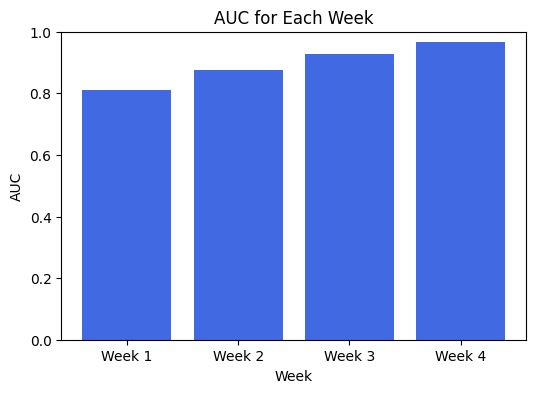

In [ ]:
# Create a bar plot to visualize AUC for each week
plt.figure(figsize=(6, 4))
plt.bar(range(num_weeks), auc_scores, color='royalblue')
plt.xlabel('Week')
plt.ylabel('AUC')
plt.title('AUC for Each Week')
plt.xticks(range(num_weeks), [f'Week {week + 1}' for week in range(num_weeks)])
plt.ylim(0, 1.0)  # Set the y-axis limit between 0 and 1
plt.show()

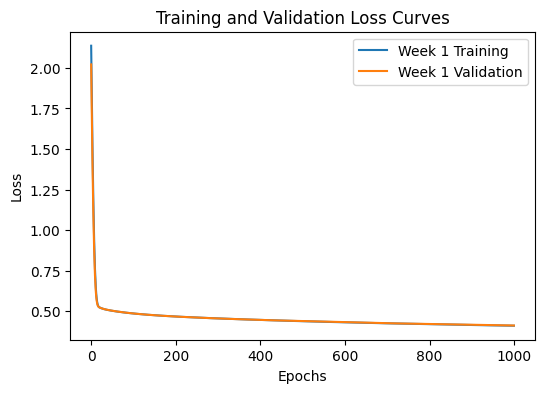

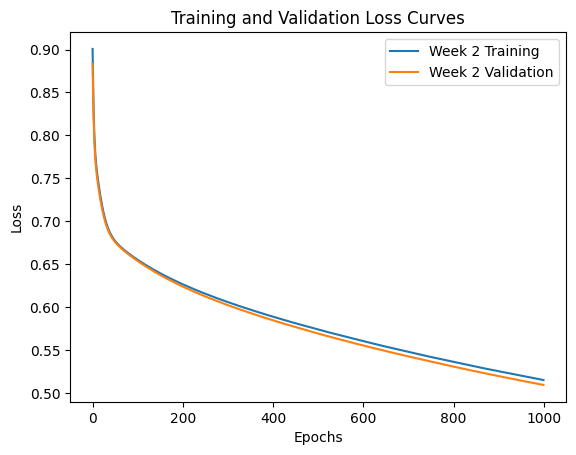

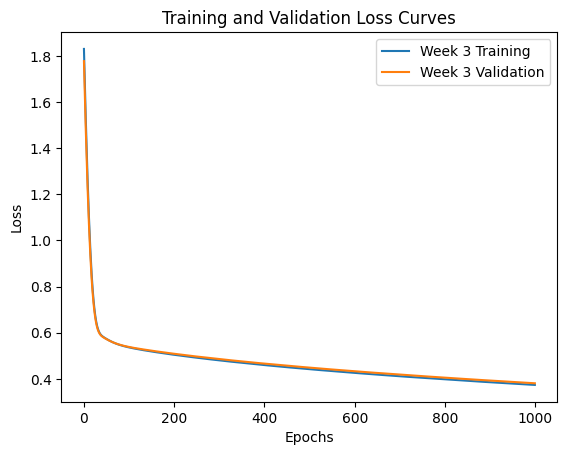

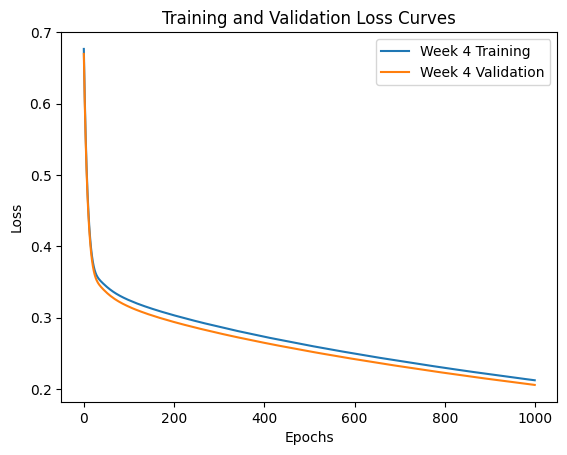

In [ ]:
# Plot training and validation loss curves
plt.figure(figsize=(6, 4))
for week in range(num_weeks):
    plt.plot(training_losses[week], label=f'Week {week + 1} Training')
    plt.plot(validation_losses[week], label=f'Week {week + 1} Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Curves')
    plt.legend()
    plt.show()